## Prompt Chaining Workflow

Prompt chaining is a structured workflow in which multiple prompts are executed in sequence(pass sequentially to LLM), with each prompt performing a specific subtask and passing its output forward,enabling complex reasoning, modular design, and improved reliability in LLM applications.

In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
model = ChatOpenAI()

# What we are going to do?
We Will give topic to LLM to generate Blog

First we will give topic , LLM will genererate outline for that , then after analyzing outlibg generate Detailed Prompt


In [ ]:
# Define a State
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [ ]:
# Logic | Function For Node 1
def create_outline(state: BlogState) -> BlogState:
    # Extract Topic
    topic = state['title']

    # create a prompt
    prompt = f" Generate a detaild Outline for  Blog on Topic {topic}" 

    # Give topic to LLM
    outline = model.invoke(prompt).content

    # Update state
    state['outline'] = outline

    return state

# Logic | Function For Node 2
def create_blog(state: BlogState) -> BlogState:
    # extract topic and outline
    title = state['title']
    outline = state['outline']

    # Create a prompt
    prompt = f'Generate a detailed Blog on the title{title} using the following outline \n {outline}'
    
    # LLM call
    content = model.invoke(prompt).content

    # Update state
    state['content'] = content

    return state


In [5]:
# Define a Graph
graph = StateGraph(BlogState)

# Add Nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog',create_blog)

# Add Edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

# Compile Graph
workflow = graph.compile()

In [ ]:
# Execute Workflow
initialState = {'title': 'rise of A.I in india'}
finalState =  workflow.invoke(initialState)
print(finalState)

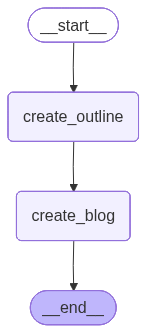

In [6]:
# Visulizing the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
